<a href="https://colab.research.google.com/github/hburnt/Machine-Learning/blob/main/intro_to_ml/SVM/Support_Vector_Machine_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
def featureExtraction(kernelFunction, inputs, feature_amount):
  pca = KernelPCA(n_components=feature_amount, kernel = kernelFunction)
  principalComponents = pca.fit_transform(inputs)
  principalDF = pd.DataFrame(data = principalComponents)
  updatedInputs = principalDF.values
  return updatedInputs

In [50]:
def printTest(feature_amount, kernelFunction, report):
  print("Amount of features:", feature_amount)
  print("Kernel function used:", kernelFunction)
  print(report)
  print("-------------------------------------------------------------")

Amount of features: 1
Kernel function used: linear
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

-------------------------------------------------------------
Amount of features: 2
Kernel function used: linear
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.88      0.94      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

-------------------------------------------------------------
Amount of features: 5
Kernel function used: linear
              precision    recall  f1-score   support

           0  

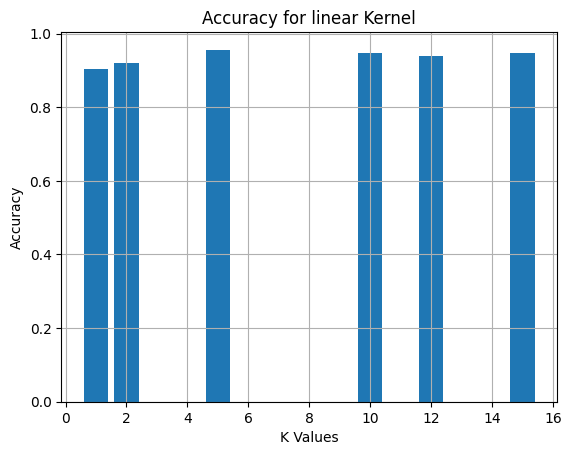

Amount of features: 1
Kernel function used: sigmoid
              precision    recall  f1-score   support

           0       0.87      0.82      0.85        67
           1       0.76      0.83      0.80        47

    accuracy                           0.82       114
   macro avg       0.82      0.83      0.82       114
weighted avg       0.83      0.82      0.83       114

-------------------------------------------------------------
Amount of features: 2
Kernel function used: sigmoid
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.89      0.89      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

-------------------------------------------------------------
Amount of features: 5
Kernel function used: sigmoid
              precision    recall  f1-score   support

           

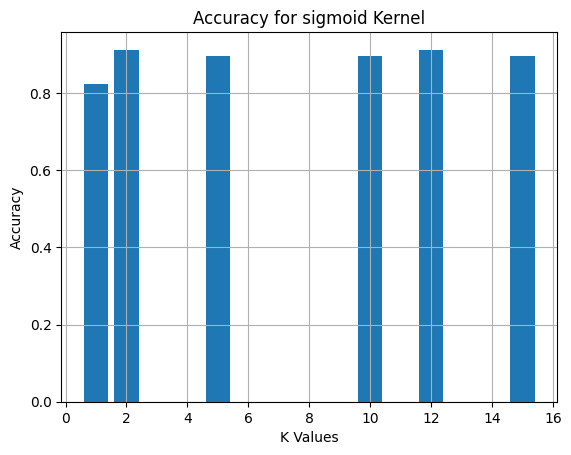

Amount of features: 1
Kernel function used: rbf
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        67
           1       0.86      0.89      0.88        47

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114

-------------------------------------------------------------
Amount of features: 2
Kernel function used: rbf
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        67
           1       0.86      0.91      0.89        47

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114

-------------------------------------------------------------
Amount of features: 5
Kernel function used: rbf
              precision    recall  f1-score   support

           0       0.98

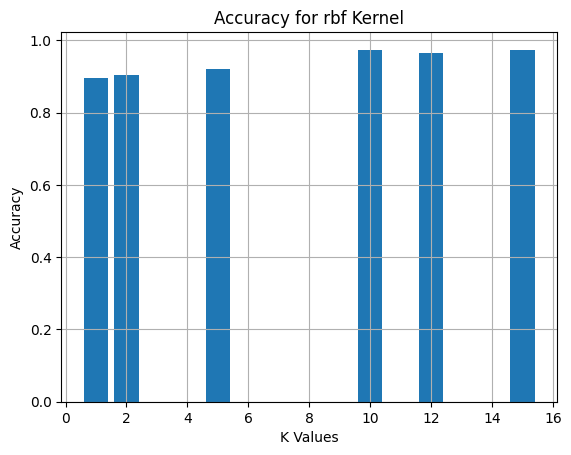

Amount of features: 1
Kernel function used: poly
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        67
           1       1.00      0.21      0.35        47

    accuracy                           0.68       114
   macro avg       0.82      0.61      0.57       114
weighted avg       0.79      0.68      0.61       114

-------------------------------------------------------------
Amount of features: 2
Kernel function used: poly
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        67
           1       1.00      0.21      0.35        47

    accuracy                           0.68       114
   macro avg       0.82      0.61      0.57       114
weighted avg       0.79      0.68      0.61       114

-------------------------------------------------------------
Amount of features: 5
Kernel function used: poly
              precision    recall  f1-score   support

           0       0

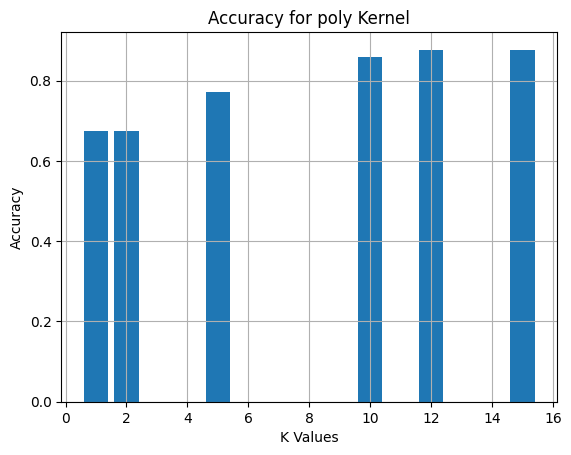

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.metrics import accuracy_score

url = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/cancer.csv'

dataset = pd.DataFrame(pd.read_csv(url))
dataset.head()

def binary_map(x):
  return x.map({'M': 1, 'B': 0})

varlist = ['diagnosis']
dataset[varlist] = dataset[varlist].apply(binary_map)

dataset.isnull().sum()
dataset.isna().sum()

# Separating inputs and outputs
inputs = dataset.iloc[:, 2:32].values
outputs = dataset.iloc[:,1].values

sc_inputs = StandardScaler()
inputs = sc_inputs.fit_transform(inputs)

# PCA feature extration
kernelFunctions = ['linear', 'sigmoid', 'rbf', 'poly']
kernelFunctions_last_index = len(kernelFunctions)
K = [1, 2, 5, 10, 12, 15]

# Test different random states
state_seeds = [1, 50, 42, 100, 30]

for i in range(0,kernelFunctions_last_index):
  acc = []
  for N in K:
    newInputs = featureExtraction(kernelFunctions[i], inputs, N)
    train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(newInputs, outputs, test_size = 0.2, random_state = 0)
    model = SVC(kernel = kernelFunctions[i], C = 200)
    model.fit(train_inputs, train_outputs)

    Output_prediction = model.predict(test_inputs)

    cnf_matrix = confusion_matrix(test_outputs, Output_prediction)
    report  = classification_report(test_outputs, Output_prediction)
    acc.append(accuracy_score(test_outputs, Output_prediction))
    printTest(N, kernelFunctions[i], report)
  # Plotting Accuracy for different kernels and K values
  plt.bar(K[0:6], acc[0:6])
  plt.ylabel('Accuracy')
  plt.xlabel('K Values')
  plt.title(f'Accuracy for %s Kernel' % kernelFunctions[i])
  plt.grid()
  plt.show()
